# Clustering

In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.dates as mdates
import seaborn as sns
#from calendar import day_name
from pandas.api.types import CategoricalDtype

import warnings;
warnings.filterwarnings('ignore');

In [2]:
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')

#if you have the problem that you cannot load this data, try to update your conda version and packages

In [3]:
#delete all NaN values
booking_set.dropna()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,21366843,51000,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,Nein,Nein,0.0,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,21367069,51000,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Nein,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,21367072,51000,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Nein,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,21367118,51000,117519,A1062EF019B4E3E71C551572F1B284D55440E3C4,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Nein,Nein,0.0,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,21367155,51000,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Nein,Nein,0.0,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228291,46385337,51000,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:15:40,2017-05-16 07:19:49,Ja,Nein,0.0,Heußweg/Wiesenstraße,201326.0,Lappenbergsallee / Bei der Apostelkirche,243618.0,Standort,Hamburg,Terminal HH_11 (-2225-)
16228292,46385422,50000,113209,5C813C6CA8C97E4788F3F456F9E3A78C6FFCBAE9,2017-05-16 07:19:50,2017-05-16 07:19:50,2017-05-16 07:26:36,Ja,Nein,0.0,7600 Bad Cannstatt Bahnhof,62997.0,7635 Mercedes-Benz-Museum,62999.0,Standort,Stuttgart,Android CAB
16228293,46385755,51000,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:36:36,2017-05-16 07:44:16,Ja,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Neuer Pferdemarkt / Beim Grünen Jäger,131890.0,Standort,Hamburg,iPhone SRH
16228294,46385768,50000,165809,469EBC0DFB6D733E8C4AE1A7605B56170F7F636B,2017-05-16 07:37:07,2017-05-16 07:37:07,2017-05-16 08:09:42,Ja,Nein,0.0,Frankenallee / Schwalbacherstraße,214452.0,Frankenallee / Schwalbacherstraße,214452.0,Standort,Frankfurt am Main,IVR


In [4]:
booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]
booking_set_frankfurt

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
11,21366889,50000,106071,9C652AE093696A00AE03CE808E41FEB8207586E3,2014-01-01 00:46:33,2014-01-01 00:46:33,2014-01-01 00:54:20,Nein,Nein,0.0,Ostbahnhof,227447.0,NaN,NaN,Standort,Frankfurt am Main,iPhone CAB
17,21367245,50000,108136,52F601C735727653A8113E8AD5AC52E3BF89B492,2014-01-01 02:34:11,2014-01-01 02:34:11,2014-01-01 02:55:57,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,Rosa-Luxemburg-Straße / Ginnheimer Landstraße,231648.0,Standort,Frankfurt am Main,IVR
26,21367472,50000,109066,849E39869B95293B7F0DF50F3F4CC95ED129ED52,2014-01-01 03:27:52,2014-01-01 03:27:52,2014-01-01 03:31:29,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
30,21368072,50000,116406,D7EB6708429AFFCAC213B716FF7BA2C0D1FFCAAE,2014-01-01 07:01:31,2014-01-01 07:01:31,2014-01-01 07:07:57,Nein,Nein,0.0,Bettinaplatz / Bettinastraße,214394.0,NaN,NaN,Standort,Frankfurt am Main,IVR
31,21368145,50000,116338,58429BD51BD30BA6D2B41CCBA3E3EE733DE9D07B,2014-01-01 08:02:11,2014-01-01 08:02:11,2014-01-01 08:13:56,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228278,46382177,50000,163499,902CF8DEF6AA158418C036CCE6717D7551E671A3,2017-05-15 22:29:05,2017-05-15 22:29:05,2017-05-15 22:34:12,Ja,Nein,0.0,NaN,NaN,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Standort,Frankfurt am Main,IVR
16228279,46382184,50000,164121,A799BA8BA9892CBFF1CAA0C8481FAF49C27D2062,2017-05-15 22:29:25,2017-05-15 22:29:25,2017-05-15 22:43:06,Ja,Nein,0.0,Wendelsplatz / Darmstädter Landstraße,254302.0,Wittelsbacher Allee/ Habsburger Allee,227464.0,Standort,Frankfurt am Main,iPhone CAB
16228285,46382655,50000,165782,D940F501E7B61380A54B2AA0AD8DC7D6757237EF,2017-05-15 22:59:04,2017-05-15 22:59:04,2017-05-15 23:13:56,Ja,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Arnsburger Straße / Mainkurstraße,227475.0,Standort,Frankfurt am Main,Android CAB
16228287,46383071,50000,164539,3D6E9CE1A4A554AF82B92020BCFAF4B6AC886446,2017-05-15 23:30:24,2017-05-15 23:30:24,2017-05-15 23:39:53,Ja,Nein,0.0,Bockenheimer Landstraße / Liebigstraße,31166.0,Kaufunger Straße / Kleine Seestraße,28835.0,Standort,Frankfurt am Main,iPhone CAB


In [5]:
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]


In [6]:
booking_set_frankfurt_20152016['DATE_UNTIL'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_UNTIL'])
booking_set_frankfurt_20152016['DATE_UNTIL'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt_20152016['DATE_FROM'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_FROM'])
booking_set_frankfurt_20152016['DATE_FROM'].dt.strftime('%Y-%m-%d %X')

4284612     2015-01-01 00:21:22
4285336     2015-01-01 00:30:20
4285873     2015-01-01 00:42:51
4286542     2015-01-01 01:00:19
4286567     2015-01-01 01:00:47
                   ...         
14613160    2016-12-31 23:13:00
14613511    2016-12-31 23:23:28
14612056    2016-12-31 23:24:03
14615815    2016-12-31 23:28:04
14612244    2016-12-31 23:40:33
Name: DATE_FROM, Length: 1431643, dtype: object

In [7]:
booking_set_frankfurt_20152016['duration'] = booking_set_frankfurt_20152016['DATE_UNTIL'] - booking_set_frankfurt_20152016['DATE_FROM']


In [65]:
first_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL', 'CUSTOMER_HAL_ID', 'duration']] #show just these two columns
first_cluster_set

,BOOKING_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,CUSTOMER_HAL_ID,duration
4284612,27689006,227726.0,12635.0,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,0 days 00:03:56
4285336,27689041,214380.0,214393.0,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,0284A643498771058AA8BB3555DF8828D6D08635,0 days 00:11:32
4285873,27689080,226253.0,231602.0,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,0 days 00:25:58
4286542,27689151,227460.0,214402.0,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,4BFADBFCF0460E0B9517D8769FE3610099585392,0 days 00:11:00
4286567,27689154,227460.0,214402.0,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,0 days 00:10:33
...,...,...,...,...,...,...,...,...
14613160,43561784,214419.0,214419.0,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,1 days 09:08:32
14613511,43561828,28951.0,226348.0,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,CDA293642336D184957723DFFD87734B5E6F2CDB,0 days 00:22:31
14612056,43561832,257334.0,254285.0,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,0 days 00:08:47
14615815,43561863,257334.0,227484.0,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,0 days 00:05:21


In [66]:
first_cluster_set['year'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%Y')
first_cluster_set['month'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%m')
first_cluster_set['date'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%d')
first_cluster_set['hour'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%H')
first_cluster_set['Day'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%a')

In [67]:
first_cluster_set = first_cluster_set.loc[:,['BOOKING_HAL_ID', 'month', 'duration']]

In [58]:
first_cluster_set

,BOOKING_HAL_ID,month,duration
4284612,27689006,01,0 days 00:03:56
4285336,27689041,01,0 days 00:11:32
4285873,27689080,01,0 days 00:25:58
4286542,27689151,01,0 days 00:11:00
4286567,27689154,01,0 days 00:10:33
...,...,...,...
14613160,43561784,12,1 days 09:08:32
14613511,43561828,12,0 days 00:22:31
14612056,43561832,12,0 days 00:08:47
14615815,43561863,12,0 days 00:05:21


In [68]:
first_cluster_set = first_cluster_set.set_index('BOOKING_HAL_ID')

In [69]:
first_cluster_set['duration'] = pd.to_numeric(first_cluster_set['duration'])
first_cluster_set['month'] = pd.to_numeric(first_cluster_set['month'])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(first_cluster_set)
X_scaled = scaler.transform(first_cluster_set)
X_scaled_df = pd.DataFrame(X_scaled, columns=first_cluster_set.columns, index=first_cluster_set.index)
X_scaled_df.head()

,month,duration
BOOKING_HAL_ID,,
27689006,-2.038174,-0.027756
27689041,-2.038174,-0.020477
27689080,-2.038174,-0.006653
27689151,-2.038174,-0.020988
27689154,-2.038174,-0.021419


In [20]:
from sklearn.cluster import KMeans

In [23]:
#k_max = 12
#clusters = []
#losses = []

#for k in range(k_max):
#    model = KMeans(n_clusters=k+1)
#    model.fit(X_scaled)
#    clusters.append(k+1)
#    losses.append(model.inertia_)

In [24]:
#plt.plot(clusters, losses)
#plt.show()

In [25]:
means = KMeans(n_clusters=4)
means.fit(X_scaled)
means.predict(X_scaled)

array([1, 1, 1, ..., 3, 3, 3])

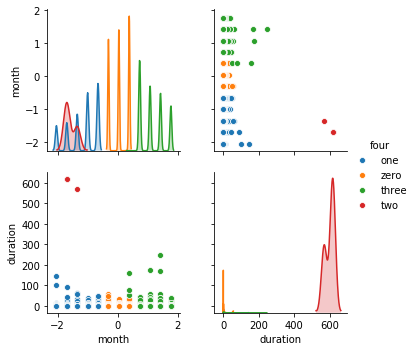

In [26]:
#the following diagrams are for the ones of the seasons, so basically the months vs the duration and see if there is a
#difference

numbers = ["zero", "one", "two", "three", "four"]

X_scaled_df["four"] = means.predict(X_scaled)
X_scaled_df["four"] = X_scaled_df["four"].apply(lambda x: numbers[x])
sns.pairplot(data=X_scaled_df, hue="four")

In [27]:
y_pred = means.predict(X_scaled)

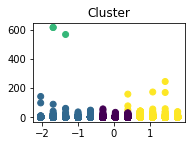

In [28]:
plt.subplot(224)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.title("Cluster")

plt.show()

In [37]:
#now just trying to scale the duration with a different scaler 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
first_cluster_set['duration'] = min_max_scaler.fit_transform(first_cluster_set[['duration']])
first_cluster_set

,month,duration
BOOKING_HAL_ID,,
27689006,1,0.000006
27689041,1,0.000018
27689080,1,0.000040
27689151,1,0.000017
27689154,1,0.000016
...,...,...
43561784,12,0.003082
43561828,12,0.000035
43561832,12,0.000014


In [49]:
#means = KMeans(n_clusters=4)
#means.fit(first_cluster_set)
#means.predict(first_cluster_set)
#y_pred = means.predict(first_cluster_set)
#plt.subplot(224)
#plt.scatter(first_cluster_set[:, 0], first_cluster_set[:, 1], c=y_pred)
#plt.title("Cluster")

#plt.show()

In [70]:
#the same but with just scaling the duration
scaler = StandardScaler()
scaler.fit(first_cluster_set[['duration']])
first_cluster_set['duration'] = scaler.transform(first_cluster_set[['duration']])
first_cluster_set

,month,duration
BOOKING_HAL_ID,,
27689006,1,-0.027756
27689041,1,-0.020477
27689080,1,-0.006653
27689151,1,-0.020988
27689154,1,-0.021419
...,...,...
43561784,12,1.873042
43561828,12,-0.009957
43561832,12,-0.023111


IndexError: index 1 is out of bounds for axis 1 with size 1

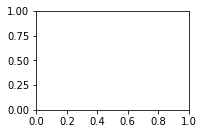

In [71]:
means = KMeans(n_clusters=4)
means.fit(first_cluster_set)
means.predict(first_cluster_set)
y_pred = means.predict(first_cluster_set)

#this was to get an earlier error resolved
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(first_cluster_set.iloc[:, 1:3])
first_cluster_set = imputer.transform(first_cluster_set.iloc[:, 1:3])

plt.subplot(224)
plt.scatter(first_cluster_set[:, 0], first_cluster_set[:, 1], c=y_pred)
plt.title("Cluster")

plt.show()
#i dont understand why he wont plot it 
#i dont understand why the error: index 1 is out of bounds for axis 1 with size 1

In [160]:
#what

# Customer types: Start/end time -> Berufsfahrer wann am tag eine person wirklich fährt 
Rushhour fahrer, hobby fahrer, wochenende, sportler 
Wetter fahrer

In [90]:
#so here its basically the time of the day and later its a 3D with duration
second_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'DATE_FROM', 'DATE_UNTIL']] #show just these two columns
second_cluster_set

,BOOKING_HAL_ID,DATE_FROM,DATE_UNTIL
4284612,27689006,2015-01-01 00:21:22,2015-01-01 00:25:18
4285336,27689041,2015-01-01 00:30:20,2015-01-01 00:41:52
4285873,27689080,2015-01-01 00:42:51,2015-01-01 01:08:49
4286542,27689151,2015-01-01 01:00:19,2015-01-01 01:11:19
4286567,27689154,2015-01-01 01:00:47,2015-01-01 01:11:20
...,...,...,...
14613160,43561784,2016-12-31 23:13:00,2017-01-02 08:21:32
14613511,43561828,2016-12-31 23:23:28,2016-12-31 23:45:59
14612056,43561832,2016-12-31 23:24:03,2016-12-31 23:32:50
14615815,43561863,2016-12-31 23:28:04,2016-12-31 23:33:25


In [91]:
second_cluster_set['DATE_FROM'] = pd.to_numeric(second_cluster_set['DATE_FROM'])
second_cluster_set['DATE_UNTIL'] = pd.to_numeric(second_cluster_set['DATE_UNTIL'])

In [92]:
second_cluster_set = second_cluster_set.set_index('BOOKING_HAL_ID')
second_cluster_set

,DATE_FROM,DATE_UNTIL
BOOKING_HAL_ID,,
27689006,1420071682000000000,1420071918000000000
27689041,1420072220000000000,1420072912000000000
27689080,1420072971000000000,1420074529000000000
27689151,1420074019000000000,1420074679000000000
27689154,1420074047000000000,1420074680000000000
...,...,...
43561784,1483225980000000000,1483345292000000000
43561828,1483226608000000000,1483227959000000000
43561832,1483226643000000000,1483227170000000000


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(second_cluster_set)
Z_scaled = scaler.transform(second_cluster_set)
Z_scaled_df = pd.DataFrame(X_scaled, columns=second_cluster_set.columns, index=second_cluster_set.index)
Z_scaled_df.head()

,DATE_FROM,DATE_UNTIL
BOOKING_HAL_ID,,
27689006,-2.038174,-0.027756
27689041,-2.038174,-0.020477
27689080,-2.038174,-0.006653
27689151,-2.038174,-0.020988
27689154,-2.038174,-0.021419


In [94]:
means = KMeans(n_clusters=4)
means.fit(Z_scaled)
means.predict(Z_scaled)

array([0, 0, 0, ..., 1, 1, 1])

In [95]:
z_pred = means.predict(Z_scaled)

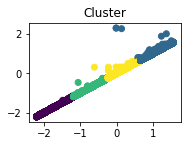

In [96]:
plt.subplot(224)
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=z_pred)
plt.title("Cluster")

plt.show()

In [102]:
means = KMeans(n_clusters=6)
means.fit(Z_scaled)
means.predict(Z_scaled)

array([5, 5, 5, ..., 4, 4, 4])

In [103]:
z_pred = means.predict(Z_scaled)

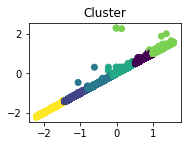

In [104]:
plt.subplot(224)
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=z_pred)
plt.title("Cluster")

plt.show()

In [97]:
third_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'DATE_FROM', 'DATE_UNTIL', 'duration']] #show just these two columns
third_cluster_set

,BOOKING_HAL_ID,DATE_FROM,DATE_UNTIL,duration
4284612,27689006,2015-01-01 00:21:22,2015-01-01 00:25:18,0 days 00:03:56
4285336,27689041,2015-01-01 00:30:20,2015-01-01 00:41:52,0 days 00:11:32
4285873,27689080,2015-01-01 00:42:51,2015-01-01 01:08:49,0 days 00:25:58
4286542,27689151,2015-01-01 01:00:19,2015-01-01 01:11:19,0 days 00:11:00
4286567,27689154,2015-01-01 01:00:47,2015-01-01 01:11:20,0 days 00:10:33
...,...,...,...,...
14613160,43561784,2016-12-31 23:13:00,2017-01-02 08:21:32,1 days 09:08:32
14613511,43561828,2016-12-31 23:23:28,2016-12-31 23:45:59,0 days 00:22:31
14612056,43561832,2016-12-31 23:24:03,2016-12-31 23:32:50,0 days 00:08:47
14615815,43561863,2016-12-31 23:28:04,2016-12-31 23:33:25,0 days 00:05:21


In [98]:
third_cluster_set['DATE_FROM'] = pd.to_numeric(third_cluster_set['DATE_FROM'])
third_cluster_set['DATE_UNTIL'] = pd.to_numeric(third_cluster_set['DATE_UNTIL'])
third_cluster_set['duration'] = pd.to_numeric(third_cluster_set['duration'])

In [99]:
third_cluster_set = third_cluster_set.set_index('BOOKING_HAL_ID')
third_cluster_set

,DATE_FROM,DATE_UNTIL,duration
BOOKING_HAL_ID,,,
27689006,1420071682000000000,1420071918000000000,236000000000
27689041,1420072220000000000,1420072912000000000,692000000000
27689080,1420072971000000000,1420074529000000000,1558000000000
27689151,1420074019000000000,1420074679000000000,660000000000
27689154,1420074047000000000,1420074680000000000,633000000000
...,...,...,...
43561784,1483225980000000000,1483345292000000000,119312000000000
43561828,1483226608000000000,1483227959000000000,1351000000000
43561832,1483226643000000000,1483227170000000000,527000000000


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(third_cluster_set)
B_scaled = scaler.transform(third_cluster_set)
B_scaled_df = pd.DataFrame(B_scaled, columns=third_cluster_set.columns, index=third_cluster_set.index)
B_scaled_df.head()

,DATE_FROM,DATE_UNTIL,duration
BOOKING_HAL_ID,,,
27689006,-2.202391,-2.202449,-0.027756
27689041,-2.202359,-2.202390,-0.020477
27689080,-2.202314,-2.202294,-0.006653
27689151,-2.202251,-2.202285,-0.020988
27689154,-2.202250,-2.202285,-0.021419


In [117]:
#B_scaled_df.BOOKING_HAL_ID.dtype
B_scaled_df.DATE_FROM.dtype
B_scaled_df.DATE_UNTIL.dtype
B_scaled_df.duration.dtype

dtype('float64')

In [105]:
means = KMeans(n_clusters=6)
means.fit(B_scaled)
means.predict(B_scaled)

array([4, 4, 4, ..., 1, 1, 1])

In [106]:
b_pred = means.predict(B_scaled)

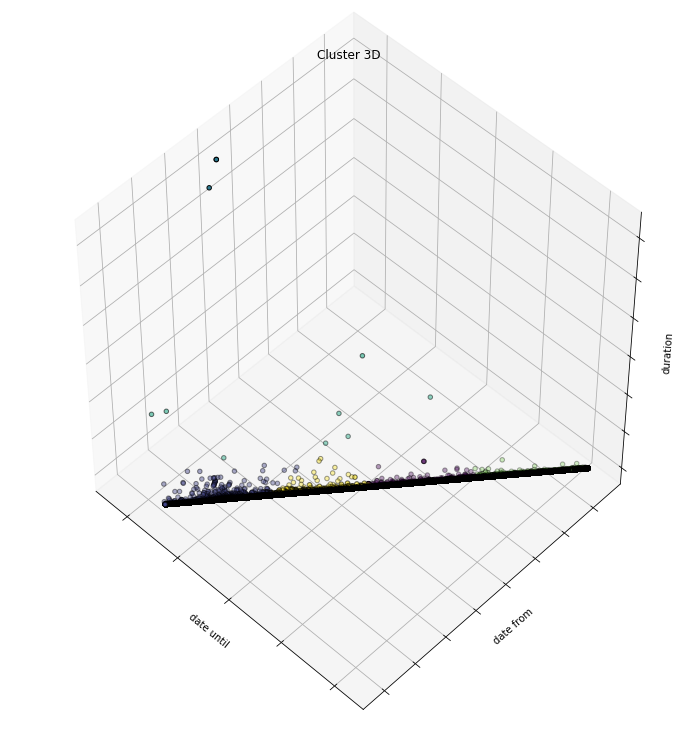

In [233]:
# Plot the ground truth
from mpl_toolkits.mplot3d import Axes3D
y = B_scaled_df.columns
x = B_scaled_df
fignum = 1
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#for name, label in [('1', 0),
 #                   ('2', 1),
  #                  ('3', 2)]:
   # ax.text3D(x[y == label, 1].mean(),
    #          x[y == label, 0].mean(),
     #         x[y == label, 2].mean() + 2, name,
      #        horizontalalignment='center',
       #       bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(B_scaled[:, 1], B_scaled[:, 0], B_scaled[:, 2], c=b_pred, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('date until')
ax.set_ylabel('date from')
ax.set_zlabel('duration')
ax.set_title('Cluster 3D')
ax.dist = 10

fig.show()
#so the plot looks like shit basically

In [130]:
#B_scaled['DATE_FROM'] = B_scaled.DATE_FROM.astype(int)

In [135]:
#B_scaled.DATE_FROM.dtype

In [137]:
#plot_from_scaled = sns.distplot(B_scaled_df['DATE_FROM'])
#plot_until_scaled = sns.distplot(B_scaled_df['DATE_UNTIL'])
#plot_duration_scaled = sns.distplot(B_scaled_df['duration'])
#plt.xlabel('from / until / duration')

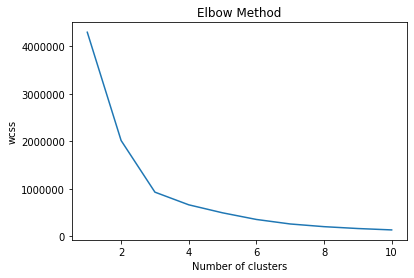

In [136]:
#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(B_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
#perfect amount of clusters is 3 or 4 

In [ ]:
#want to check 3D model also for time from until with the day

In [181]:
fifth_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL']] #show just these two columns


In [182]:
fifth_cluster_set['year'] = fifth_cluster_set['DATE_BOOKING'].dt.strftime('%Y')
fifth_cluster_set['month'] = fifth_cluster_set['DATE_BOOKING'].dt.strftime('%m')
fifth_cluster_set['date'] = fifth_cluster_set['DATE_BOOKING'].dt.strftime('%d')
fifth_cluster_set['hour'] = fifth_cluster_set['DATE_BOOKING'].dt.strftime('%H')
fifth_cluster_set['Day'] = fifth_cluster_set['DATE_BOOKING'].dt.strftime('%w')

In [183]:
fifth_cluster_set = fifth_cluster_set.loc[:,['BOOKING_HAL_ID', 'DATE_FROM', 'DATE_UNTIL', 'Day']]
fifth_cluster_set

,BOOKING_HAL_ID,DATE_FROM,DATE_UNTIL,Day
4284612,27689006,2015-01-01 00:21:22,2015-01-01 00:25:18,4
4285336,27689041,2015-01-01 00:30:20,2015-01-01 00:41:52,4
4285873,27689080,2015-01-01 00:42:51,2015-01-01 01:08:49,4
4286542,27689151,2015-01-01 01:00:19,2015-01-01 01:11:19,4
4286567,27689154,2015-01-01 01:00:47,2015-01-01 01:11:20,4
...,...,...,...,...
14613160,43561784,2016-12-31 23:13:00,2017-01-02 08:21:32,6
14613511,43561828,2016-12-31 23:23:28,2016-12-31 23:45:59,6
14612056,43561832,2016-12-31 23:24:03,2016-12-31 23:32:50,6
14615815,43561863,2016-12-31 23:28:04,2016-12-31 23:33:25,6


In [184]:
fifth_cluster_set = fifth_cluster_set.set_index('BOOKING_HAL_ID')

In [186]:
fifth_cluster_set['Day'] = pd.to_numeric(fifth_cluster_set['Day'])
fifth_cluster_set['DATE_FROM'] = pd.to_numeric(fifth_cluster_set['DATE_FROM'])
fifth_cluster_set['DATE_UNTIL'] = pd.to_numeric(fifth_cluster_set['DATE_UNTIL'])

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(fifth_cluster_set)
D_scaled = scaler.transform(fifth_cluster_set)
D_scaled_df = pd.DataFrame(D_scaled, columns=fifth_cluster_set.columns, index=fifth_cluster_set.index)
D_scaled_df.head()

,DATE_FROM,DATE_UNTIL,Day
BOOKING_HAL_ID,,,
27689006,-2.202391,-2.202449,0.515141
27689041,-2.202359,-2.202390,0.515141
27689080,-2.202314,-2.202294,0.515141
27689151,-2.202251,-2.202285,0.515141
27689154,-2.202250,-2.202285,0.515141


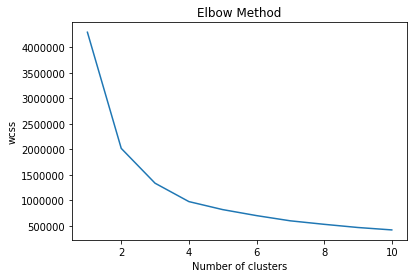

In [188]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(D_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [193]:
means = KMeans(n_clusters=4)
means.fit(D_scaled)
means.predict(D_scaled)

array([0, 0, 0, ..., 3, 3, 3])

In [194]:
d_pred = means.predict(D_scaled)

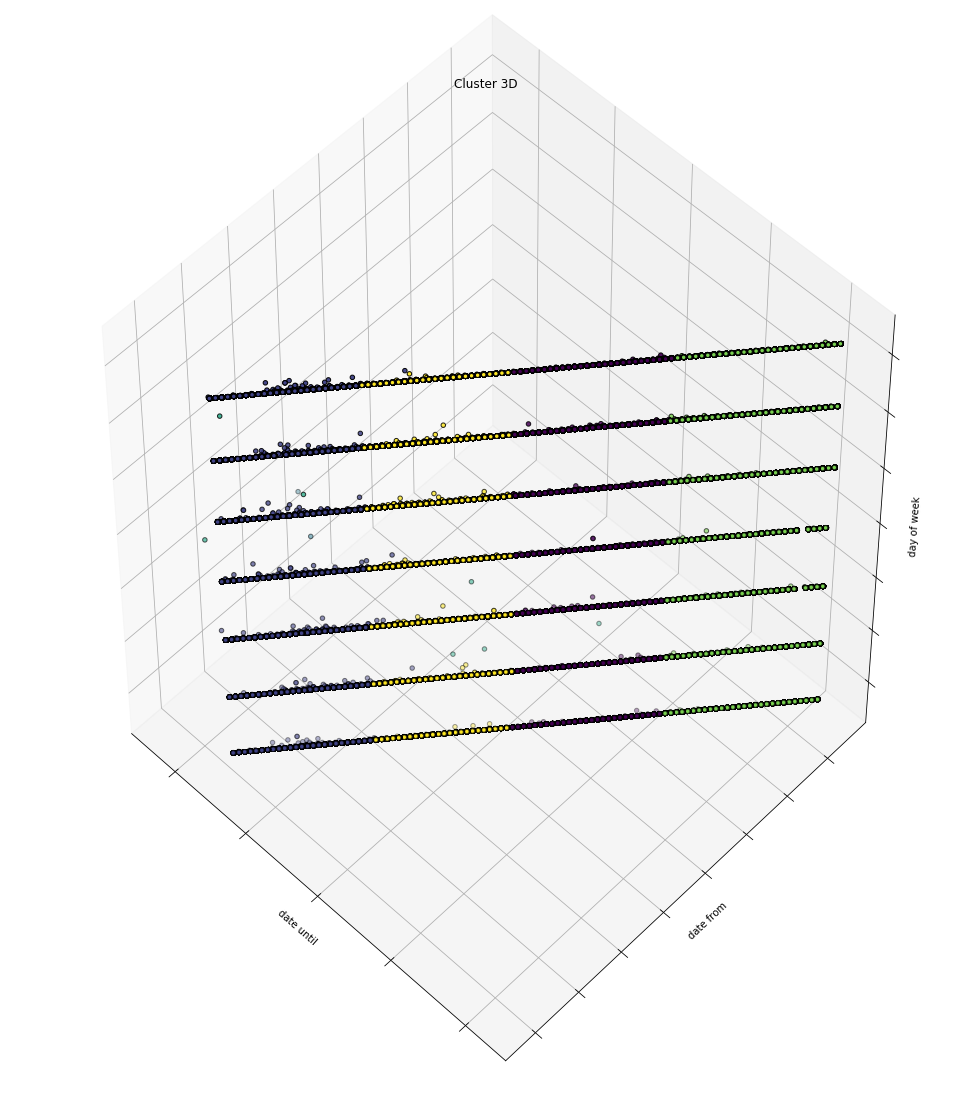

In [199]:
# Plot the ground truth
y = D_scaled_df.columns
x = D_scaled_df
fignum = 1
fig = plt.figure(fignum, figsize=(14, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(D_scaled[:, 1], D_scaled[:, 0], D_scaled[:, 2], c=b_pred, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('date until')
ax.set_ylabel('date from')
ax.set_zlabel('day of week')
ax.set_title('Cluster 3D')
ax.dist = 10

fig.show()

In [ ]:
#try to do sth similar with the customer id

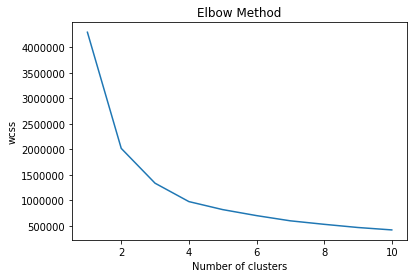

In [202]:
sixth_cluster_set = booking_set_frankfurt_20152016.loc[:,['CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL']] #show just these two columns
sixth_cluster_set['year'] = sixth_cluster_set['DATE_BOOKING'].dt.strftime('%Y')
sixth_cluster_set['month'] = sixth_cluster_set['DATE_BOOKING'].dt.strftime('%m')
sixth_cluster_set['date'] = sixth_cluster_set['DATE_BOOKING'].dt.strftime('%d')
sixth_cluster_set['hour'] = sixth_cluster_set['DATE_BOOKING'].dt.strftime('%H')
sixth_cluster_set['Day'] = sixth_cluster_set['DATE_BOOKING'].dt.strftime('%w')
sixth_cluster_set = sixth_cluster_set.loc[:,['CUSTOMER_HAL_ID', 'DATE_FROM', 'DATE_UNTIL', 'Day']]
sixth_cluster_set = sixth_cluster_set.set_index('CUSTOMER_HAL_ID')
sixth_cluster_set['Day'] = pd.to_numeric(sixth_cluster_set['Day'])
sixth_cluster_set['DATE_FROM'] = pd.to_numeric(sixth_cluster_set['DATE_FROM'])
sixth_cluster_set['DATE_UNTIL'] = pd.to_numeric(sixth_cluster_set['DATE_UNTIL'])
scaler = StandardScaler()
scaler.fit(sixth_cluster_set)
F_scaled = scaler.transform(sixth_cluster_set)
F_scaled_df = pd.DataFrame(F_scaled, columns=fifth_cluster_set.columns, index=sixth_cluster_set.index)
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(F_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


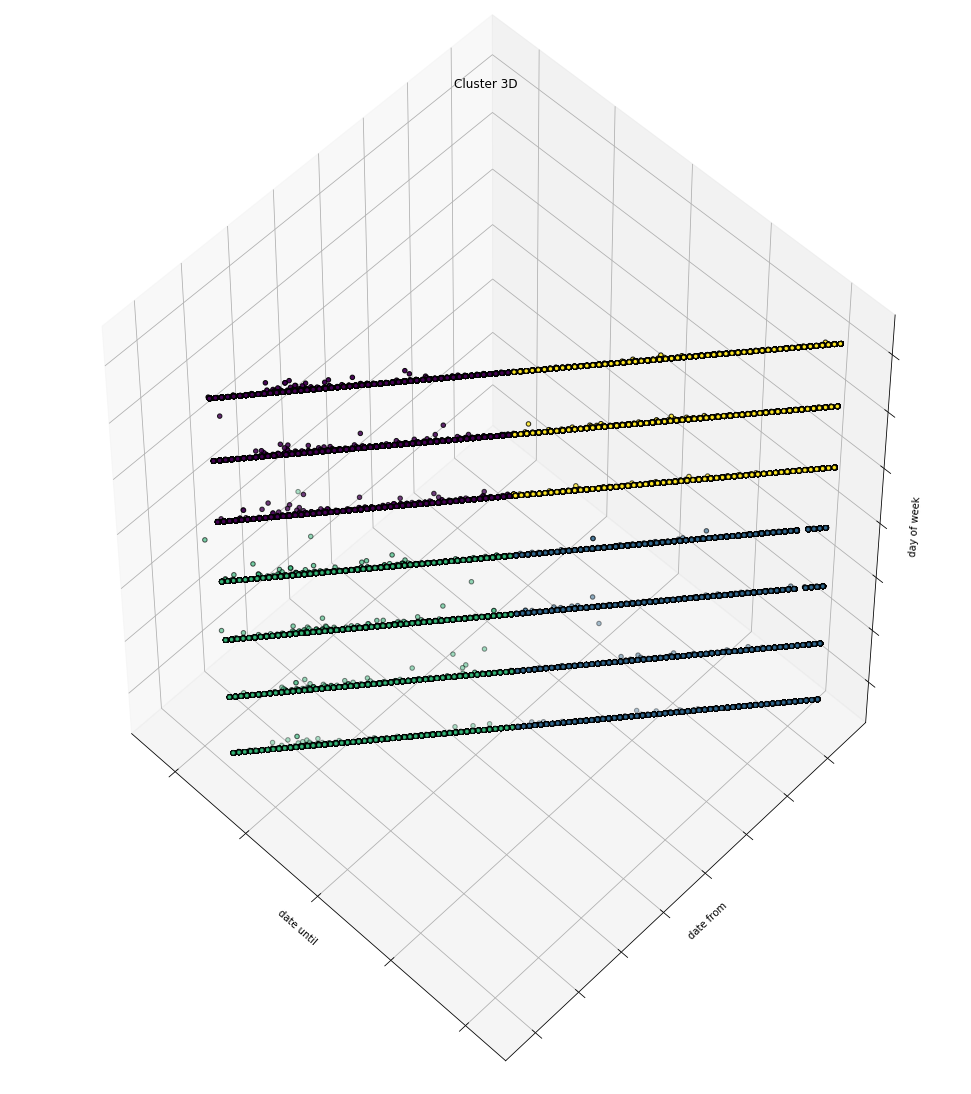

In [203]:
means = KMeans(n_clusters=4)
means.fit(F_scaled)
means.predict(F_scaled)
f_pred = means.predict(F_scaled)
y = F_scaled_df.columns
x = F_scaled_df
fignum = 1
fig = plt.figure(fignum, figsize=(14, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(F_scaled[:, 1], F_scaled[:, 0], F_scaled[:, 2], c=f_pred, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('date until')
ax.set_ylabel('date from')
ax.set_zlabel('day of week')
ax.set_title('Cluster 3D')
ax.dist = 10

fig.show()

In [ ]:
#vielleicht macht mit group by vorher arbeiten mehr Sinn?

In [ ]:
#last one with customer hal id, hour and day of week 

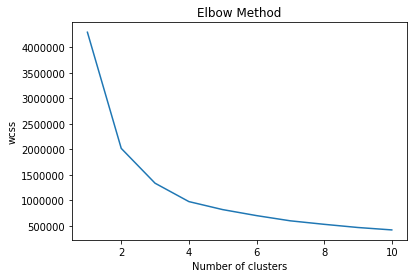

In [213]:
seventh_cluster_set = booking_set_frankfurt_20152016.loc[:,['CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL']] #show just these two columns
seventh_cluster_set['year'] = seventh_cluster_set['DATE_BOOKING'].dt.strftime('%Y')
seventh_cluster_set['month'] = seventh_cluster_set['DATE_BOOKING'].dt.strftime('%m')
seventh_cluster_set['date'] = seventh_cluster_set['DATE_BOOKING'].dt.strftime('%d')
seventh_cluster_set['hour'] = seventh_cluster_set['DATE_BOOKING'].dt.strftime('%H')
seventh_cluster_set['Day'] = seventh_cluster_set['DATE_BOOKING'].dt.strftime('%w')
seventh_cluster_set = seventh_cluster_set.loc[:,['CUSTOMER_HAL_ID', 'hour', 'Day']]
seventh_cluster_set = seventh_cluster_set.set_index('CUSTOMER_HAL_ID')
seventh_cluster_set['Day'] = pd.to_numeric(seventh_cluster_set['Day'])
seventh_cluster_set['hour'] = pd.to_numeric(seventh_cluster_set['hour'])
scaler = StandardScaler()
scaler.fit(seventh_cluster_set)
E_scaled = scaler.transform(seventh_cluster_set)
E_scaled_df = pd.DataFrame(E_scaled, columns=seventh_cluster_set.columns, index=seventh_cluster_set.index)
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(F_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [216]:
E_scaled_df.head()

,hour,Day
CUSTOMER_HAL_ID,,
94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,-2.517638,0.515141
0284A643498771058AA8BB3555DF8828D6D08635,-2.517638,0.515141
E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,-2.517638,0.515141
4BFADBFCF0460E0B9517D8769FE3610099585392,-2.335466,0.515141
0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,-2.335466,0.515141


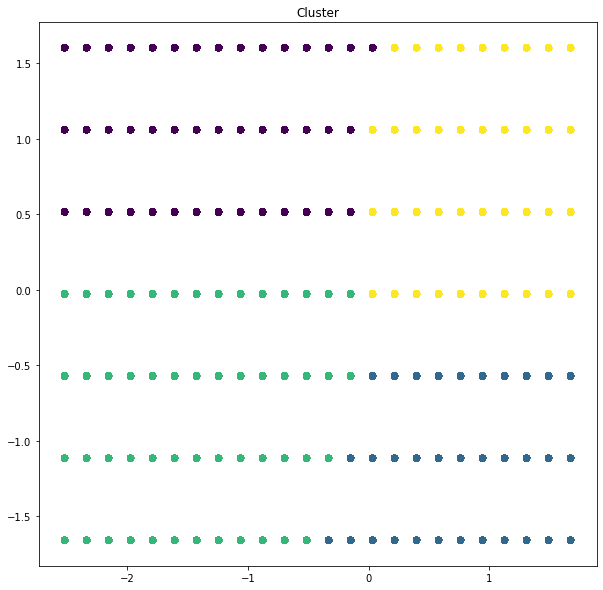

In [218]:
means = KMeans(n_clusters=4)
means.fit(E_scaled)
means.predict(E_scaled)

e_pred = means.predict(E_scaled)

plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(E_scaled[:, 0], E_scaled[:, 1], c=e_pred)
plt.title("Cluster")

plt.show()
#okay fuck this 

In [21]:
first_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'duration']] #show just these two columns
first_cluster_set

,BOOKING_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,duration
4284612,27689006,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,2015-01-01 00:21:22,NaN
4285336,27689041,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,NaN
4285873,27689080,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,NaN
4286542,27689151,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,NaN
4286567,27689154,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,NaN
...,...,...,...,...
14613160,43561784,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2016-12-31 23:13:00,NaN
14613511,43561828,CDA293642336D184957723DFFD87734B5E6F2CDB,2016-12-31 23:23:28,NaN
14612056,43561832,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,2016-12-31 23:24:03,NaN
14615815,43561863,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,2016-12-31 23:28:04,NaN


In [22]:
first_cluster_set['year'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%Y')
first_cluster_set['month'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%m')
first_cluster_set['date'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%d')
first_cluster_set['hour'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%H')
first_cluster_set['Day'] = first_cluster_set['DATE_BOOKING'].dt.strftime('%w')

In [23]:
first_cluster_set

,BOOKING_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,duration,year,month,date,hour,Day
4284612,27689006,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,2015-01-01 00:21:22,NaN,2015,01,01,00,4
4285336,27689041,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,NaN,2015,01,01,00,4
4285873,27689080,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,NaN,2015,01,01,00,4
4286542,27689151,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,NaN,2015,01,01,01,4
4286567,27689154,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,NaN,2015,01,01,01,4
...,...,...,...,...,...,...,...,...,...
14613160,43561784,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2016-12-31 23:13:00,NaN,2016,12,31,23,6
14613511,43561828,CDA293642336D184957723DFFD87734B5E6F2CDB,2016-12-31 23:23:28,NaN,2016,12,31,23,6
14612056,43561832,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,2016-12-31 23:24:03,NaN,2016,12,31,23,6
14615815,43561863,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,2016-12-31 23:28:04,NaN,2016,12,31,23,6


In [24]:
#first_cluster_set = first_cluster_set.set_index('CUSTOMER_HAL_ID')
first_cluster_set = first_cluster_set.loc[:,['BOOKING_HAL_ID', 'CUSTOMER_HAL_ID', 'Day']] #show just these two columns


In [25]:
first_cluster_set['CUSTOMER_HAL_ID'].nunique()

45771

In [26]:
cluster_set = first_cluster_set.groupby(['CUSTOMER_HAL_ID', 'Day'], as_index = False).count()
#okay maybe im stupid here but shouldnt this be able to group by customers, so 45771 entries and then calculate how many 
#bookings that prson had a day of the week???

In [27]:
cluster_set #for fucks sake why wont he do it

,CUSTOMER_HAL_ID,Day,BOOKING_HAL_ID
0,00001C3CCBB086C084B1E36B2B986404FFD80725,0,3
1,00001C3CCBB086C084B1E36B2B986404FFD80725,1,1
2,00001C3CCBB086C084B1E36B2B986404FFD80725,2,2
3,00001C3CCBB086C084B1E36B2B986404FFD80725,3,3
4,00001C3CCBB086C084B1E36B2B986404FFD80725,6,1
...,...,...,...
168368,FFFE6C8DB0A601AADA7F68BFCB501D005A062829,0,1
168369,FFFE6C8DB0A601AADA7F68BFCB501D005A062829,1,1
168370,FFFE6C8DB0A601AADA7F68BFCB501D005A062829,3,1
168371,FFFE6C8DB0A601AADA7F68BFCB501D005A062829,4,1


In [28]:
first_cluster_set = cluster_set.set_index('CUSTOMER_HAL_ID')
first_cluster_set

,Day,BOOKING_HAL_ID
CUSTOMER_HAL_ID,,
00001C3CCBB086C084B1E36B2B986404FFD80725,0,3
00001C3CCBB086C084B1E36B2B986404FFD80725,1,1
00001C3CCBB086C084B1E36B2B986404FFD80725,2,2
00001C3CCBB086C084B1E36B2B986404FFD80725,3,3
00001C3CCBB086C084B1E36B2B986404FFD80725,6,1
...,...,...
FFFE6C8DB0A601AADA7F68BFCB501D005A062829,0,1
FFFE6C8DB0A601AADA7F68BFCB501D005A062829,1,1
FFFE6C8DB0A601AADA7F68BFCB501D005A062829,3,1


In [29]:
#group by customer and count bookings, then make customer index, before its index scaling wont work 
scaler = StandardScaler()
scaler.fit(first_cluster_set)
C_scaled = scaler.transform(first_cluster_set)
C_scaled_df = pd.DataFrame(C_scaled, columns=first_cluster_set.columns, index=first_cluster_set.index)
C_scaled_df.head()

,Day,BOOKING_HAL_ID
CUSTOMER_HAL_ID,,
00001C3CCBB086C084B1E36B2B986404FFD80725,-1.548945,-0.361967
00001C3CCBB086C084B1E36B2B986404FFD80725,-1.041532,-0.493524
00001C3CCBB086C084B1E36B2B986404FFD80725,-0.534120,-0.427745
00001C3CCBB086C084B1E36B2B986404FFD80725,-0.026707,-0.361967
00001C3CCBB086C084B1E36B2B986404FFD80725,1.495532,-0.493524


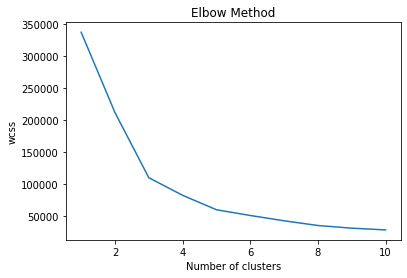

In [30]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(C_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

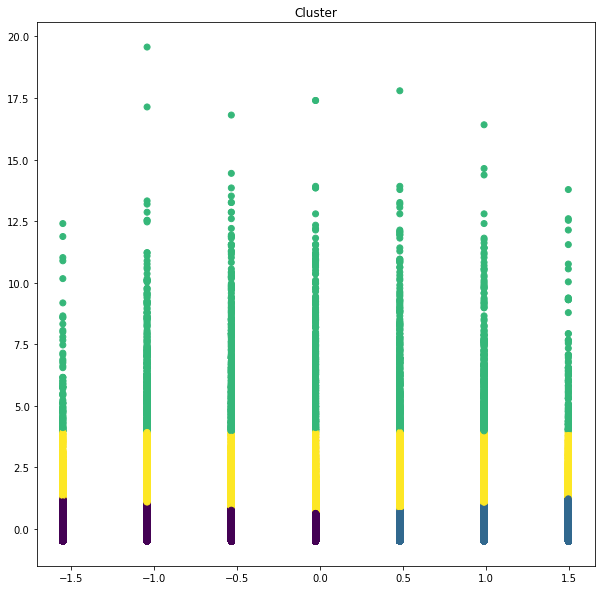

In [31]:
means = KMeans(n_clusters=4)
means.fit(C_scaled)
means.predict(C_scaled)

c_pred = means.predict(C_scaled)

plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=c_pred)
plt.title("Cluster")

plt.show()
#i feel like this plot might show us sth but i dont get how to read it

# location types

In [ ]:
#basically here its the start and end rental zone 

In [154]:
fourth_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID']] #show just these two columns
fourth_cluster_set = fourth_cluster_set.set_index('BOOKING_HAL_ID')
fourth_cluster_set

,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID
BOOKING_HAL_ID,,
27689006,227726.0,12635.0
27689041,214380.0,214393.0
27689080,226253.0,231602.0
27689151,227460.0,214402.0
27689154,227460.0,214402.0
...,...,...
43561784,214419.0,214419.0
43561828,28951.0,226348.0
43561832,257334.0,254285.0


In [155]:
scaler = StandardScaler()
scaler.fit(fourth_cluster_set)
C_scaled = scaler.transform(fourth_cluster_set)
C_scaled_df = pd.DataFrame(C_scaled, columns=fourth_cluster_set.columns, index=fourth_cluster_set.index)
C_scaled_df.head()

,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID
BOOKING_HAL_ID,,
27689006,0.545823,-1.956128
27689041,0.389866,0.394452
27689080,0.528610,0.594945
27689151,0.542715,0.394556
27689154,0.542715,0.394556


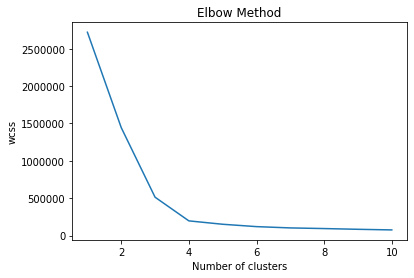

In [156]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(C_scaled_df.iloc[:, 0:2])
C_scaled_df = imputer.transform(C_scaled_df.iloc[:, 0:2])

wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(C_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [157]:
means = KMeans(n_clusters=3)
means.fit(C_scaled_df)
means.predict(C_scaled_df)

array([1, 0, 0, ..., 0, 0, 0])

In [158]:
c_pred = means.predict(C_scaled_df)

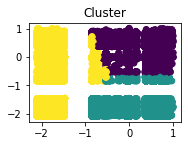

In [159]:
plt.subplot(224)
plt.scatter(C_scaled_df[:, 0], C_scaled_df[:, 1], c=c_pred)
plt.title("Cluster")

plt.show()

In [167]:
means = KMeans(n_clusters=4)
means.fit(C_scaled_df)
means.predict(C_scaled_df)

array([3, 0, 0, ..., 0, 0, 0])

In [168]:
c_pred = means.predict(C_scaled_df)

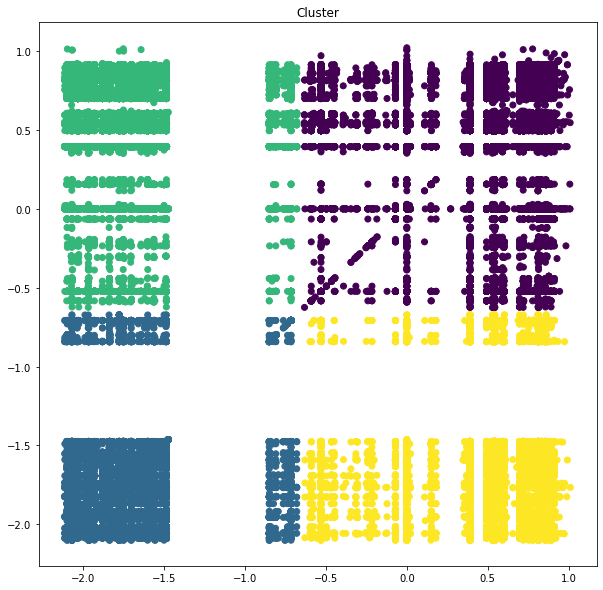

In [200]:
plt.subplots(1, 1, figsize=(10,10))
plt.scatter(C_scaled_df[:, 0], C_scaled_df[:, 1], c=c_pred)
plt.title("Cluster")

plt.show()

In [206]:
#2D Customer Hal id
eigth_cluster_set = booking_set_frankfurt_20152016.loc[:,['CUSTOMER_HAL_ID', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID']] #show just these two columns
eigth_cluster_set = eigth_cluster_set.set_index('CUSTOMER_HAL_ID')
scaler = StandardScaler()
scaler.fit(eigth_cluster_set)
Y_scaled = scaler.transform(eigth_cluster_set)
Y_scaled_df = pd.DataFrame(Y_scaled, columns=eigth_cluster_set.columns, index=eigth_cluster_set.index)


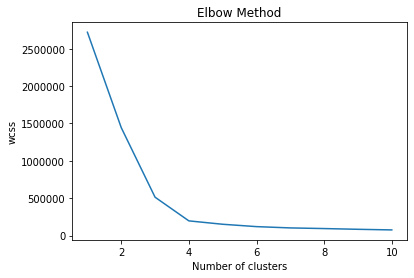

In [207]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(Y_scaled_df.iloc[:, 0:2])
Y_scaled_df = imputer.transform(Y_scaled_df.iloc[:, 0:2])

wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(Y_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

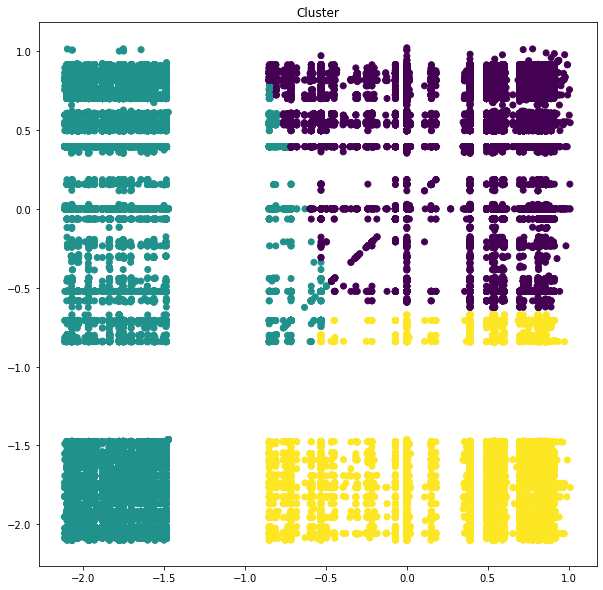

In [209]:
means = KMeans(n_clusters=3)
means.fit(Y_scaled_df)
means.predict(Y_scaled_df)
y_pred = means.predict(Y_scaled_df)
plt.subplots(1, 1, figsize=(10,10))
plt.scatter(C_scaled_df[:, 0], Y_scaled_df[:, 1], c=y_pred)
plt.title("Cluster")

plt.show()

In [219]:
#3D with Customer Hal id

In [230]:
ninth_cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'CUSTOMER_HAL_ID', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID']] #show just these two columns
ninth_cluster_set = ninth_cluster_set.set_index('BOOKING_HAL_ID')

In [232]:
ninth_cluster_set['CUSTOMER_HAL_ID'] = ninth_cluster_set['CUSTOMER_HAL_ID'].astype(float)
#CoUld NOt coNVeRT stRInG To flOAt

ValueError: could not convert string to float: '94E208715C9AA8B3258F2CF2BCF421FE059DFAAA'

In [226]:
ninth_cluster_set.CUSTOMER_HAL_ID.dtype

dtype('float64')

In [228]:
ninth_cluster_set

,CUSTOMER_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID
BOOKING_HAL_ID,,,
27689006,NaN,227726.0,12635.0
27689041,NaN,214380.0,214393.0
27689080,NaN,226253.0,231602.0
27689151,NaN,227460.0,214402.0
27689154,NaN,227460.0,214402.0
...,...,...,...
43561784,NaN,214419.0,214419.0
43561828,NaN,28951.0,226348.0
43561832,NaN,257334.0,254285.0


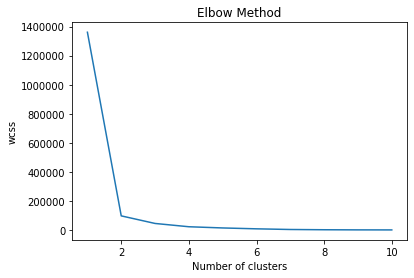

In [227]:
scaler = StandardScaler()
scaler.fit(ninth_cluster_set)
G_scaled = scaler.transform(ninth_cluster_set)
G_scaled_df = pd.DataFrame(G_scaled, columns=ninth_cluster_set.columns, index=ninth_cluster_set.index)

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(G_scaled_df.iloc[:, 0:2])
G_scaled_df = imputer.transform(G_scaled_df.iloc[:, 0:2])

wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(G_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [6]:
cluster_set = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID']] #show just these two columns
cluster_set = cluster_set.set_index('START_RENTAL_ZONE_HAL_ID')
cluster_set

,BOOKING_HAL_ID,VEHICLE_HAL_ID
START_RENTAL_ZONE_HAL_ID,,
227726.0,27689006,110326
214380.0,27689041,115667
226253.0,27689080,116175
227460.0,27689151,110256
227460.0,27689154,116123
...,...,...
214419.0,43561784,165502
28951.0,43561828,164856
257334.0,43561832,164045


In [7]:
cluster_set.groupby(['START_RENTAL_ZONE_HAL_ID'], as_index = False)['BOOKING_HAL_ID', 'VEHICLE_HAL_ID'].count()

,BOOKING_HAL_ID,VEHICLE_HAL_ID
0,33,33
1,8,8
2,83,83
3,5,5
4,7,7
...,...,...
4799,1,1
4800,1,1
4801,1,1
4802,1,1


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cluster_set)
C_scaled = scaler.transform(cluster_set)
C_scaled_df = pd.DataFrame(C_scaled, columns=cluster_set.columns, index=cluster_set.index)
C_scaled_df.head()

,BOOKING_HAL_ID,VEHICLE_HAL_ID
START_RENTAL_ZONE_HAL_ID,,
227726.0,-1.986337,-1.532796
214380.0,-1.986329,-1.311098
226253.0,-1.986321,-1.290012
227460.0,-1.986304,-1.535702
227460.0,-1.986304,-1.292171


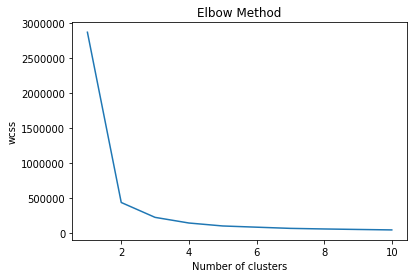

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(C_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

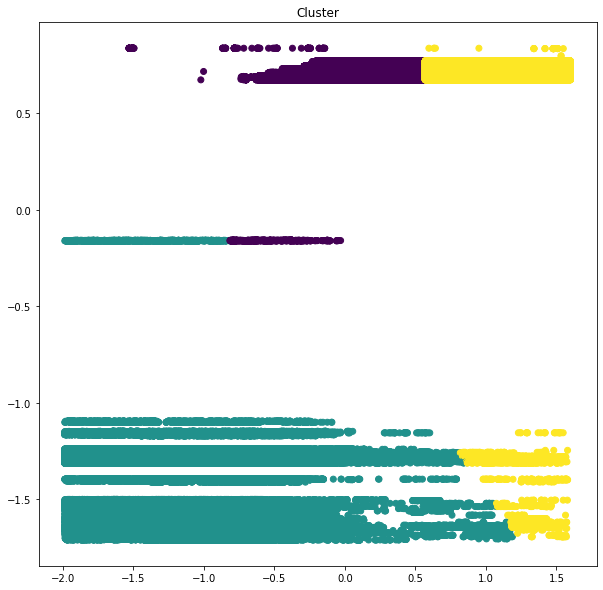

In [11]:
means = KMeans(n_clusters=3)
means.fit(C_scaled)
means.predict(C_scaled)
c_pred = means.predict(C_scaled)
plt.subplots(1, 1, figsize=(10,10))
plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=c_pred)
plt.title("Cluster")

plt.show()
#why the actual fuck does it look like that

In [22]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


agglo = AgglomerativeClustering(n_clusters=3)
y_pred_agglo = agglo.fit_predict(C_scaled)

plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, labels=agglo.labels_)
plt.show()

MemoryError: Unable to allocate array with shape (1024800123903,) and data type float64

In [ ]:
#oh great its too big fuck you